In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import array, cos, sin, tan, arctan, exp, log, pi

# This is the key function for solving systems of equations numerically
from scipy.optimize import root 

# Systems of Equations

In the course of solving optimization problems, one often needs to solve systems of equations, and sometimes large ones. One way to do this numerically is the `root` function from `scipy.optimize` (imported above). 

Let's peek at its [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html), but don't get bogged down in the details.

In [2]:
help(root)

Help on function root in module scipy.optimize._root:

root(fun, x0, args=(), method='hybr', jac=None, tol=None, callback=None, options=None)
    Find a root of a vector function.
    
    Parameters
    ----------
    fun : callable
        A vector function to find a root of.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its Jacobian.
    method : str, optional
        Type of solver. Should be one of
    
            - 'hybr'             :ref:`(see here) <optimize.root-hybr>`
            - 'lm'               :ref:`(see here) <optimize.root-lm>`
            - 'broyden1'         :ref:`(see here) <optimize.root-broyden1>`
            - 'broyden2'         :ref:`(see here) <optimize.root-broyden2>`
            - 'anderson'         :ref:`(see here) <optimize.root-anderson>`
            - 'linearmixing'     :ref:`(see here) <optimize.root-linearmixing>`
            - 'diagbroyden'      :ref:`(see here) <optim

The important thing is that `root` tries to solve the equation $$f(x) = 0$$ numerically, starting with an initial "guess" of $x_0$. 

To do this, `root` function needs two inputs, a function (or _callable_) `fun` and a point `x0` in its domain. It then calls a solver (you can investigate and customize these, but it is quite the rabbithole) and and reports back results. 

## First example. 

Let's start simply and solve $$\cos x = x.$$ We know this has a solution for some $0 < x < \pi/2$ but don't have a good way of finding it.  

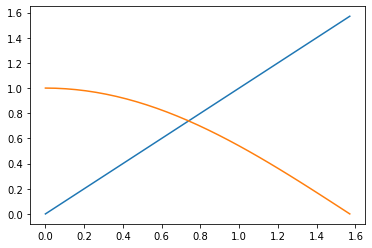

In [3]:
# plot cos and and x to see their intersection. 
x = np.linspace(0,pi/2,31)
plt.plot(x,x,x,cos(x));

Now, there is a simple trick to turning the solution of an equation into the zero of a function. It is good old subtraction. 

In [4]:
def f(x):
    return cos(x) - x

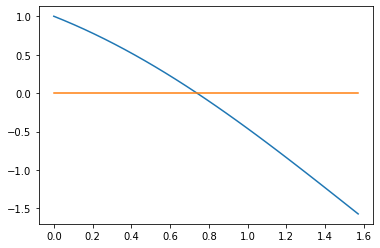

In [5]:
x = np.linspace(0,pi/2,31)
plt.plot(x,f(x),x,0*x);

In [6]:
# Now just invoke root and give it a guess. 
root(f,.5)

    fjac: array([[-1.]])
     fun: array([7.77156117e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.19423882e-09])
       r: array([1.67361078])
  status: 1
 success: True
       x: array([0.73908513])

That's a lot of information, but the most important bit is the solution `x` and the `success` flag. We can capture all this in an object and then just use the pieces we need. 

In [7]:
sol = root(f,.5)
print(sol.message)
x, = sol.x # that comma is there because root stores the solution as an array. 

The solution converged.


In [8]:
# Note the solution is a numeric approximation and thus not exact. 
print(x,cos(x))

0.7390851332151601 0.7390851332151609


## Exercise

Find all the solutions to $$e^x - 2x = 1$$. 

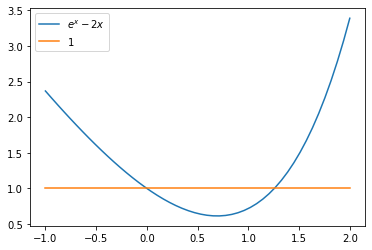

In [9]:
xs = np.linspace(-1,2,50)
plt.plot(xs,exp(xs) - 2*xs,label="$e^x-2x$")
plt.plot(xs,np.ones_like(xs),label="$1$");
plt.legend();

In [10]:
def f(x):
    return # insert formula here

### Warning

Bad initial guesses can confuse the solver. Why does this code fail to find $\sqrt{2}$? Can you fix it?

In [11]:
def g(x): return x**2 - 2
root(g,0)

    fjac: array([[-1.]])
     fun: array([-2.])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 13
     qtf: array([2.])
       r: array([0.])
  status: 5
 success: False
       x: array([0.])

# Systems

The solution to any system of equations can be expressed as a root-finding problem by using vectors. `root` can take a vector-valued function as its callable. 

**Important** When dealing with several variables, the function given to `root` must take an array as its argument, not several variables. 

## First example

Find two numbers that sum to 51 where one is twice the other. 

That is, we solve the system 

$$x + y = 51 $$
$$x-2y =0 $$


In [12]:
def F(v):
    x,y = v
    return [x+y - 51,x-2*y]

sol = root(F,[0,0])
x,y = sol.x
print(x,y)

34.0 17.0


## Example from class

<img src="halfdisk4.png" width="50%" style="float: right;">
We were trying to maximize/minimize the function $$u(x,y) = x^2 - 6x + 4y^2 - 8y$$ on the upper half-disk of radius $4$. 

Let's do the whole problem. 

In [13]:
def u(x,y):
    return x**2 - 6*x + 4*y**2 - 8*y

In [14]:
# Check the corners, store the candidates in a dictionary
candidates = dict([((4,0),u(4,0)),((-4,0),u(-4,0))])
candidates

{(4, 0): -8, (-4, 0): 40}

Find critical points $$\nabla u = \begin{bmatrix} 2x-6 \\ 8y-8 \end{bmatrix} = \mathbf 0$$

In [15]:
# Play dumb

def F(v):
    x,y = v # separate the individual inputs variables.
    return [2*x - 6, 8*y - 8]

root(F, (1,1))

    fjac: array([[-1.,  0.],
       [ 0., -1.]])
     fun: array([0., 0.])
 message: 'The solution converged.'
    nfev: 5
     qtf: array([-8.72457662e-12,  0.00000000e+00])
       r: array([-2.,  0., -8.])
  status: 1
 success: True
       x: array([3., 1.])

In [16]:
candidates[(3,1)] = u(3,1)
candidates

{(4, 0): -8, (-4, 0): 40, (3, 1): -13}

For the bottom, we use the simple constraint $g(x,y) = y = 0$ and solve the system 

$$\nabla u = \begin{bmatrix} 2x-6 \\ 8y-8 \end{bmatrix} = \lambda \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

This is equally trivial to solve, but let's use `root`. Note we have 3 variables now and so we pass in a function that takes in and returns $3$-vectors like so:

In [17]:
def G(v):
    x,y,lam = v #unpack 3 variables
    return [y,2*x-6,8*y - 8 - lam ] # note we move all terms over; the first entry is the constraint

In [18]:
root(G,(1,1,1)).x

array([ 3.00000000e+00, -4.03896783e-28, -8.00000000e+00])

In case you are unfamiliar with the notation, that middle term for $y$ represents $-4.03896783 \times 10^{-28}$ (or similar, depending on your setup), off from $0$ because of rounding errors.

In [19]:
# add to what we've got. 
candidates[(3,0)] = u(3,0)
candidates

{(4, 0): -8, (-4, 0): 40, (3, 1): -13, (3, 0): -9}

Finally, we turn to the top where $g(x,y) = x^2 + y^2 = 16$ and solve the system 

$$\nabla u = \begin{bmatrix} 2x-6 \\ 8y-8 \end{bmatrix} = \lambda \begin{bmatrix} 2x \\ 2y \end{bmatrix}$$

Not so simple a system, so we use `root`.

In [20]:
def H(v):
    x,y,lam = v 
    return [x**2 + y**2 - 16,
            2*x-6 - lam*2*x,
            8*y - 8 - lam*2*y ] 

In [21]:
sol = root(H,(-1,3,1))
print(sol.message)

The solution converged.


In [22]:
# Hooray
x,y,lam = sol.x
print(x,y,u(x,y))
candidates[(x,y)] = u(x,y)

-1.5682403059559795 3.679758462558995 36.59324116358698


In [23]:
candidates

{(4, 0): -8,
 (-4, 0): 40,
 (3, 1): -13,
 (3, 0): -9,
 (-1.5682403059559795, 3.679758462558995): 36.59324116358698}

**Bad news** we are not done. There are more solutions. The picture above suggests 3. We go hunting. 

In [24]:
# Now the tricky bit is there are other solutions to the system above. 

root(H,(-3,1,1)).x

array([-3.54241341,  1.85776942,  1.84688026])

In [25]:
x,y,lam = root(H,(3,1,1)).x
print(x,y,u(x,y))
candidates[(x,y)] = u(x,y)

3.8573141220604503 1.0588332084098793 -12.251167110468517


In [26]:
x,y,lam = root(H,(-3,1,1)).x
print(x,y,u(x,y))
candidates[(x,y)] = u(x,y)

-3.5424134137398027 1.857769416833187 32.74624676609989


In [27]:
candidates

{(4, 0): -8,
 (-4, 0): 40,
 (3, 1): -13,
 (3, 0): -9,
 (-1.5682403059559795, 3.679758462558995): 36.59324116358698,
 (3.8573141220604503, 1.0588332084098793): -12.251167110468517,
 (-3.5424134137398027, 1.857769416833187): 32.74624676609989}

But that is all, so we conlude, finally that the global max of $u$ is $40$ at the corner $(-4,0)$ and the minimum is $-13$ and the critical point.

## Bonus discussion

#### Ignore if you have other things to do

Observe:

In [28]:
x,y,lam = root(H,(0,4,1)).x
print(x,y,u(x,y))

-3.542413413745806 1.857769416832641 32.74624676617469


The initial point $(0,4)$ does not lead to the closest root. Which begs the question, which initial condition leads to which root?

In [29]:
def which_root(x0,y0):
    """This function takes the initial point (x0,y0)  and lambda=1 
    and reports back the angle from -pi/2 to 3pi/2 associated to 
    the root it finds. This will make the subsequent picture easier to draw."""
    x,y,l = root(H,(x0,y0,1)).x
    if x > 0:
        return arctan(y/x)
    elif x < 0:
        return arctan(y/x) + pi
    else:
        return sign(y)*pi/2

In [30]:
X = Y = np.linspace(-4,4,250)
X,Y = np.meshgrid(X,Y)
Z = np.vectorize(which_root)(X,Y)

<ipython-input-31-f124f06fb691>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,Z,cmap='gnuplot')


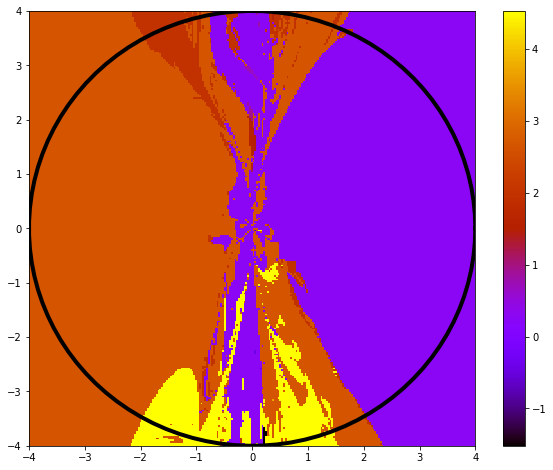

In [31]:
plt.figure(figsize=(10,8))
plt.pcolormesh(X,Y,Z,cmap='gnuplot')
plt.plot(4*cos(np.linspace(0,2*pi,100)),4*sin(np.linspace(0,2*pi,100)),'-k',lw=4)
plt.colorbar();

What does this mean? It mean these solving schemes are wickedly unstable, even chaotic. Try changing the default initial choice of $\lambda_0$ in the code above (It is at 1 now) and watch the picture change. 

In [32]:
plt.colormaps() #use these to try out other color schemes.

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co